# Урок 3. Классификация. Логистическая регрессия.

## Выполнил - Колеганов Н.Д.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Задание

1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).
4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

5*. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
6. Могла ли модель переобучиться? Почему?

## РЕШЕНИЯ

**Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.**

Первоначальный вариант calc_logloss

In [2]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

Вариант calc_logloss "без нулей"

In [3]:
def calc_logloss_new(y, y_pred):
    err = np.empty_like(y)
    for i in range(len(y)):
        if y_pred[i] == 0:
            err[i] = - (1.0 - y[i])* np.log(1.0 - y_pred[i])
        elif y_pred[i] == 1:
            err[i] = - y[i]* np.log(y_pred[i])
        else:
            err[i] = - (y[i] * np.log(y_pred[i]) + (1.0 - y[i]) * np.log(1.0 - y_pred[i]))

    return np.mean(err)

In [4]:
y1 = np.linspace(0, 1, 101)
y_pred1 = np.random.permutation(np.linspace(0, 1, 101))
calc_logloss_new(y1, y_pred1)

0.92658985433933

**Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.**

In [5]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

def eval_model(X, y, iterations, alpha=1e-4):
    
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss_new(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))

    return W, err

In [6]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)
y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [7]:
X

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [9]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

classes = datasets.make_classification(n_samples=100, n_features=2, n_informative=2,
                                       n_redundant=0, n_classes=2, random_state=1)
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_1, y_1 = classes[0][shuffle_index], classes[1][shuffle_index]

In [10]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

Первый набор для проверки

In [11]:
X_st = X.copy().astype(np.float64)
for i in range(1,4):
    X_st[i] = calc_std_feat(X[i])

Второй набор для проверки

In [12]:
X_11 = np.array([x for x in range(100)])
X__ = np.hstack((X_11.reshape(X_1.shape[0], -1), X_1))

X_st_1 = X__.copy().astype(np.float64)
for i in range(1,3):
    X_st_1[i] = calc_std_feat(X__[i])
    
X_st_1 = X_st_1.transpose()

Поиск минимальной ошибки

In [13]:
err_min = np.inf
alpha_min = 0
iteration_min = 0

err_array = []
iteration_array = []

for iter_ in range(100, 10001, 1000):
    for al in range(1, 10001, 1000):
        alpha_ = al*1e-8
        W, err = eval_model(X_st, y, iterations=iter_, alpha=alpha_)
        
        err_array.append(err)
        iteration_array.append(iter_)
        
        if err < err_min:
            err_min = err
            alpha_min = alpha_
            iteration_min = iter_
            
alpha_min, iteration_min

(9.001e-05, 9100)

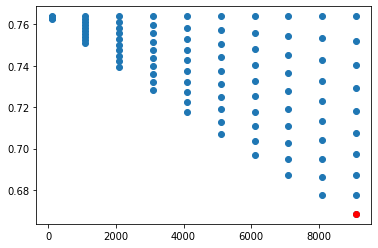

In [14]:
plt.scatter(iteration_array, err_array);
plt.scatter(iteration_min, err_min, c='r');

**Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).**

In [15]:
def calc_pred_proba(W, X):
    y_pred_proba = 1/(1 + np.exp(-W @ X))
    return y_pred_proba

In [16]:
W_1, err = eval_model(X_st, y, iterations=iteration_min, alpha=alpha_min)

y_pred_proba = calc_pred_proba(W_1, X_st)
y_pred_proba

array([0.24977731, 0.28792905, 0.70337703, 0.26842428, 0.80608757,
       0.33415087, 0.95584358, 0.95104108, 0.24078428, 0.75144844])

**Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).**

In [17]:
def calc_pred(W, X):
    
    y_pred_class_ = np.sign(np.dot(W, X))
    y_pred_class = np.empty_like(y_pred_class_)
    
    for i in range(len(y_pred_class_)):
        
        if y_pred_class_[i] == -1.0:
            y_pred_class[i] = 0
        elif y_pred_class_[i] == 1.0:
            y_pred_class[i] = 1
    
    return y_pred_class

In [18]:
y_pred_class = calc_pred(W_1, X_st)
y_pred_class

array([0., 0., 1., 0., 1., 0., 1., 1., 0., 1.])

**Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.**

In [19]:
Accuracy_ = 100.0 - np.mean(np.abs(y_pred_class - y)*100.0)
Accuracy_

80.0

In [20]:
positive_true = []
negative_true = []
positive_pred = []
negative_pred = []

for i in range(len(y)):
    if y[i] > 0:
        positive_true.append(i)
    else:
        negative_true.append(i)
    if y_pred_class[i] > 0:
        positive_pred.append(i)
    else:
        negative_pred.append(i)

In [21]:
positive_true, negative_true

([2, 4, 6, 8, 9], [0, 1, 3, 5, 7])

In [22]:
positive_pred, negative_pred

([2, 4, 6, 7, 9], [0, 1, 3, 5, 8])

In [23]:
TP = 0
FP = 0
TN = 0
FN = 0

for i in positive_true:
    if i in positive_pred:
        TP += 1
    else:
        FN += 1
        
for i in negative_true:
    if i in negative_pred:
        TN += 1
    else:
        FP += 1

Confussion_matrix = np.matrix([[TP, FP], [TN, FN]])
Confussion_matrix

matrix([[4, 1],
        [4, 1]])

In [24]:
precision = TP/(TP + FP)*100
recall = TP/(TP + FN)*100
f1_score = 2*precision*recall/(precision + recall)
print(f'Precision = {precision}, recall = {recall}, f1_score = {f1_score}')

Precision = 80.0, recall = 80.0, f1_score = 80.0


**Могла ли модель переобучиться? Почему?**

Да, т.к. модель может чрезмерно подстроиться под обучающий датасет и тем самым возникнет переобучение.